<a href="https://colab.research.google.com/github/LammyG/HDSC-Machine-Learning-Regression-/blob/main/Linear_regression_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
!pip install -U openpyxl

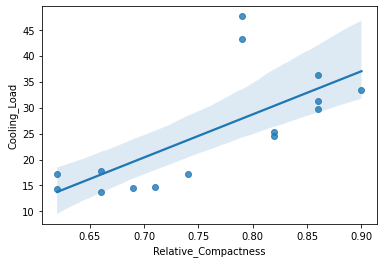

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
column_names = {'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

In [8]:
df.plot.box
df.plot.hexbin
df.plot.scatter
df.plot.density

<bound method PlotAccessor.kde of <pandas.plotting._core.PlotAccessor object at 0x7fcd3968d910>>

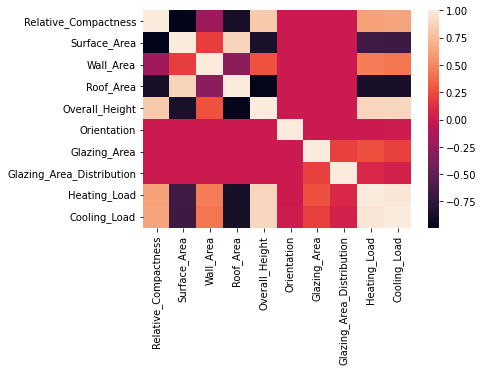

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [11]:
import sklearn as sn
import sklearn.model_selection as Ms
import sklearn.preprocessing as pp
import sklearn.linear_model as Lm

In [12]:
#Mean Absolute Error (MAE)
#Firstly we normalize our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
normalized_df = pd.DataFrame(Scaler.fit_transform(df), columns=df.columns)
features_df = normalized_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalized_df['Heating_Load']

In [13]:
#preview the normalized dataset
#compare to the main dataset
normalized_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [14]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [15]:
#let see the features of the dataset
features_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


In [16]:
#Now we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [17]:
#initializing the model
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [18]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

predicted_values

array([0.17858887, 0.5814209 , 0.75366211, 0.71948242, 0.76416016,
       0.24719238, 0.16015625, 0.61010742, 0.25488281, 0.54199219,
       0.32104492, 0.66760254, 0.69421387, 0.30761719, 0.18518066,
       0.7166748 , 0.56555176, 0.31433105, 0.25610352, 0.74621582,
       0.69812012, 0.06054688, 0.60241699, 0.32666016, 0.22216797,
       0.75842285, 0.34033203, 0.17382812, 0.80944824, 0.26831055,
       0.69238281, 0.74975586, 0.13537598, 0.28466797, 0.55444336,
       0.81237793, 0.3371582 , 0.13256836, 0.72045898, 0.25305176,
       0.82666016, 0.14782715, 0.10021973, 0.15441895, 0.10961914,
       0.14770508, 0.48364258, 0.68847656, 0.75939941, 0.72338867,
       0.09716797, 0.67138672, 0.08752441, 0.24841309, 0.77172852,
       0.77648926, 0.7479248 , 0.62817383, 0.14575195, 0.30285645,
       0.17773438, 0.59765625, 0.59863281, 0.77075195, 0.56835938,
       0.92895508, 0.68664551, 0.32006836, 0.67614746, 0.23486328,
       0.54492188, 0.24755859, 0.23181152, 0.72851562, 0.28369

In [19]:
import sklearn.metrics as ms

In [20]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [21]:
#RSS (Residual sum of squares)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
print(round(rss, 3))

1.823


In [22]:
#RMSE(Root mean squared error)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [23]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [24]:
#feature selection and lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [27]:
#the coefficient we intended regularizing
linear_model.coef_

array([-6.06412485e-01, -6.38709104e+12,  3.72580311e+12,  4.79031828e+12,
        3.85253906e-01, -2.82287598e-03,  2.29593277e-01,  1.91354752e-02])

In [35]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [43]:
#comparing the effect of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['features', col_name]
  weights_df[col_name].round(3)
  return weights_df

  linear_model_weights = get_weights_df(model, x_train, 'linear_model_weights')
  ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_weight')
  lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

  final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
  final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
